# Mini Project: Multinomial Naive Bayes
"Aku sudah mencoba berbagai model namun rasanya masih ada yang kurang, aku akan mencobanya dengan memodifikasi kembali potongan kode nilai k sama dengan 10," ucap Aksara yang merasa tertantang untuk mencoba kembali.

In [1]:
#Kode program sebelumnya
import numpy as np
import pandas as pd
pd.set_option('display.max_column', 20)

df = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx')
df.drop('kode_kontrak', axis=1, inplace=True)

y = df.pop('risk_rating').to_list()
y = [4 if label == 5 else label for label in y]
y = np.array(y)

def convert_kpr_aktif(kpr_aktif):
    if kpr_aktif == 'YA':
        return 1
    return 0

df['kpr_aktif']= df['kpr_aktif'].apply(convert_kpr_aktif)

def change_overdue(overdue):
    if overdue == '0 - 30 days':
        return 0
    elif overdue == '31 - 45 days':
        return 1
    elif overdue == '46 - 60 days':
        return 2
    elif overdue == '61 - 90 days':
        return 3
    else:
        return 4

df['rata_rata_overdue'] = df['rata_rata_overdue'].apply(change_overdue)

X = df.to_numpy()

#library yang digunakan untuk menghitung akurasi
from sklearn.metrics import accuracy_score

#library yang digunakan untuk menggunakan model MNB
from sklearn.naive_bayes import MultinomialNB

#library yang akan kita gunakan untuk membagi dataset menggunakan strategi validasi KFold
from sklearn.model_selection import KFold

#menginisialisasi object KFold dengan jumlah kelompok data = 10. nilai random_state kita gunakan reproducibility (agar data acak yang kita dapatkan untuk setiap kelompok data selalu sama)
kf = KFold(n_splits = 10, shuffle=True, random_state = 57)

scores_test = []
scores_train = []

#meminta object kf untuk memecah data X ke sejumlah n kelompok dan mengiterasi setiap train_index dan test_index
for train_index, test_index in kf.split(X):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    model = MultinomialNB()

    #menspesifikasikan data latih beserta labelnya untuk dipelajari oleh model
    model.fit(X_train, y_train)

    #meminta model yang telah dilatih untuk memprediksi data X_train
	#menampung hasil prediksi ke dalam variabel y_pred
    y_pred = model.predict(X_train)

    #menampung akurasi dari model ke variabel current_score
    current_score = accuracy_score(y_train, y_pred)

    #menambahkan skor saat ini ke list scores
    scores_train.append(current_score)

    #meminta model yang telah dilatih untuk memprediksi data X_test
	#menampung hasil prediksi ke dalam variabel y_pred
    y_pred = model.predict(X_test)

    #menampung akurasi dari model ke variabel current_score
    current_score = accuracy_score(y_test, y_pred)

    #menambahkan skor saat ini ke list scores
    scores_test.append(current_score)

print("Skor latih tertinggi: ", round(max(scores_train),2))
print("Skor latih terendah: ", round(min(scores_train),2))
print("Skor latih rata-rata: ", round(sum(scores_train)/ len(scores_train),2))

print("Skor testing tertinggi: ", round(max(scores_test),2))
print("Skor testing terendah: ", round(min(scores_test),2))
print("Skor testing rata-rata: ", round(sum(scores_test)/ len(scores_test),2))

Skor latih tertinggi:  0.7
Skor latih terendah:  0.69
Skor latih rata-rata:  0.69
Skor testing tertinggi:  0.79
Skor testing terendah:  0.61
Skor testing rata-rata:  0.7


## Mini Project: k-Nearest Neighbors
"Seperti saran dari Andra akupun mencoba dengan parameter yang lain, tetapi setelah banyak mencoba berbagai  model menurutku dengan nilai n_neighbors adalah model terbaik, nah sekarang aku akan mencoba dengan parameter lainnya, apakah hasilnya akan lebih baik," ucap Antara.

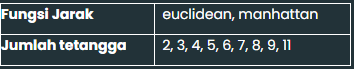



In [3]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
clf = KNeighborsClassifier()

#parameter-parameter yang akan diujicobakan pada model
parameter_space = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 11],
    'metric': ['euclidean', 'manhattan']
}

#menginisialisasi object GridSearchCV pada classifier, penjelasan terkait dengan parameter-parameter lain yang diterima pada object akan diberikan setelah potongan kode
kfold = KFold(n_splits=5, shuffle=True,random_state=57)
searcher = GridSearchCV(clf, parameter_space, scoring='accuracy', cv = kfold)

#meminta object untuk memproses data X dan y.
searcher.fit(X,y)

print("Parameter terbaik: ", searcher.best_params_)
print("Akurasi terbaik: ", searcher.best_score_)

Parameter terbaik:  {'metric': 'manhattan', 'n_neighbors': 3}
Akurasi terbaik:  0.7755555555555554
